### Training of modified U-Net for Optic Disc on DRISHTI-GS database (cross-validation fold #0).

In [1]:
%load_ext autoreload
%autoreload 2

import tensorflow as tf
import matplotlib.pyplot as plt
import h5py

from model import *
from process_images import *
from process_result import *

print('Keras version:', keras.__version__)
print('TensorFlow version:', tf.__version__)

Keras version: 2.5.0
TensorFlow version: 2.5.0


#### DRISHTI-GS

Accessing data, preparing train/validation sets division:

In [2]:
h5f = h5py.File(os.path.join(os.path.dirname(os.getcwd()), 'data', 'hdf5_datasets', 'DRISHTI_GS.hdf5'), 'r')

###############################################################################################################

img_train = h5f['DRISHTI-GS/512 px/images']
cup_train = h5f['DRISHTI-GS/512 px/cup']
disc_train = h5f['DRISHTI-GS/512 px/disc']
disc_locations = h5f['DRISHTI-GS/512 px/disc_locations']

img_test = h5f['DRISHTI-GS-test/512 px/images']
cup_test = h5f['DRISHTI-GS-test/512 px/cup']
disc_test = h5f['DRISHTI-GS-test/512 px/disc']
disc_locations_test = h5f['DRISHTI-GS-test/512 px/disc_locations']

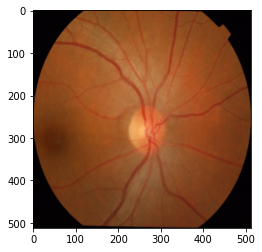

(50, 512, 512, 3)


(<HDF5 dataset "images": shape (50, 512, 512, 3), type "|u1">,
 <HDF5 dataset "cup": shape (50, 512, 512, 1), type "|u1">,
 <HDF5 dataset "disc": shape (50, 512, 512, 1), type "|u1">,
 <HDF5 dataset "disc_locations": shape (50, 4), type "<i8">)

In [3]:
plt.imshow(img_train[45])
plt.show()
print(img_train.shape)
img_train, cup_train, disc_train, disc_locations

### Train images

In [4]:
hue_channel_train = convert_to_hsv_color(img_train)
len(hue_channel_train)

50

### Test images

In [5]:
hue_channel_test = convert_to_hsv_color(img_test)
len(hue_channel_test)

51

#### Generator of augmented data:

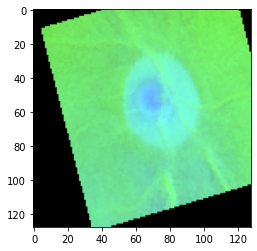

In [6]:
gen = data_generator(hue_channel_train, cup_train, disc_locations, 128, 'train', batch_size=1)
batch = next(gen)

plt.imshow(batch[0][0])

51
51


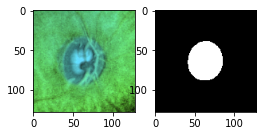

In [7]:
img_size = IMG_SIZE

X_test, Y_test = next(data_generator(hue_channel_test, cup_test, disc_locations_test, img_size, train_or_test='test', batch_size=100, stationary=True))
print(len(X_test)) 
print(len(Y_test))

#-----------------------
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1, 2, 1)
ax.imshow(np.squeeze(X_test[10]), cmap=plt.cm.Greys_r)
ax = fig.add_subplot(1, 2, 2)
ax.imshow(np.squeeze(Y_test[10]), cmap=plt.cm.Greys_r)
plt.show()

### Training and test cup

In [8]:
epochs = NUM_EPOCHS
spe = SPE

model = create_compile_model(img_size)
history_cup = train(hue_channel_train, 
                    cup_train, 
                    disc_locations, 
                    'cup_hsv', 
                    model, 
                    epochs, X_test, Y_test, img_size, spe)

Epoch 1/500
99/99 [==============================] - 17s 158ms/step - loss: 1.6570 - mean_IOU_gpu: 0.0823 - dice_metric: 0.1501 - val_loss: 1.4572 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 2/500
99/99 [==============================] - 15s 154ms/step - loss: 1.5560 - mean_IOU_gpu: 0.0366 - dice_metric: 0.0696 - val_loss: 1.3940 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 3/500
99/99 [==============================] - 15s 154ms/step - loss: 1.3738 - mean_IOU_gpu: 0.0381 - dice_metric: 0.0704 - val_loss: 1.2346 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 4/500
99/99 [==============================] - 15s 154ms/step - loss: 1.1319 - mean_IOU_gpu: 0.1937 - dice_metric: 0.3038 - val_loss: 0.7929 - val_mean_IOU_gpu: 0.2510 - val_dice_metric: 0.3519
Epoch 5/500
99/99 [==============================] - 15s 154ms/step - loss: 0.6513 - mean_IOU_gpu: 0.4486 - dice_metric: 0.5922 - val_loss: 0.5066 - val_mean_IOU_gpu: 0.3393 - 

Epoch 42/500
99/99 [==============================] - 15s 155ms/step - loss: 0.1888 - mean_IOU_gpu: 0.7030 - dice_metric: 0.8118 - val_loss: 1.4615 - val_mean_IOU_gpu: 0.0906 - val_dice_metric: 0.1482
Epoch 43/500
99/99 [==============================] - 15s 154ms/step - loss: 0.1658 - mean_IOU_gpu: 0.7214 - dice_metric: 0.8283 - val_loss: 1.3125 - val_mean_IOU_gpu: 0.1119 - val_dice_metric: 0.1792
Epoch 44/500
99/99 [==============================] - 15s 154ms/step - loss: 0.1668 - mean_IOU_gpu: 0.7242 - dice_metric: 0.8280 - val_loss: 1.2670 - val_mean_IOU_gpu: 0.1289 - val_dice_metric: 0.2015
Epoch 45/500
99/99 [==============================] - 15s 155ms/step - loss: 0.1740 - mean_IOU_gpu: 0.7155 - dice_metric: 0.8223 - val_loss: 1.0256 - val_mean_IOU_gpu: 0.1836 - val_dice_metric: 0.2780
Epoch 46/500
99/99 [==============================] - 15s 154ms/step - loss: 0.1739 - mean_IOU_gpu: 0.7085 - dice_metric: 0.8183 - val_loss: 1.0215 - val_mean_IOU_gpu: 0.1863 - val_dice_metric: 0.

Epoch 83/500
99/99 [==============================] - 15s 156ms/step - loss: 0.1410 - mean_IOU_gpu: 0.7409 - dice_metric: 0.8435 - val_loss: 0.4647 - val_mean_IOU_gpu: 0.4409 - val_dice_metric: 0.5888
Epoch 84/500
99/99 [==============================] - 15s 154ms/step - loss: 0.1820 - mean_IOU_gpu: 0.7020 - dice_metric: 0.8122 - val_loss: 0.7645 - val_mean_IOU_gpu: 0.2644 - val_dice_metric: 0.3867
Epoch 85/500
99/99 [==============================] - 15s 154ms/step - loss: 0.1359 - mean_IOU_gpu: 0.7482 - dice_metric: 0.8490 - val_loss: 0.5017 - val_mean_IOU_gpu: 0.4170 - val_dice_metric: 0.5646
Epoch 86/500
99/99 [==============================] - 15s 154ms/step - loss: 0.1648 - mean_IOU_gpu: 0.7229 - dice_metric: 0.8262 - val_loss: 0.6328 - val_mean_IOU_gpu: 0.3421 - val_dice_metric: 0.4850
Epoch 87/500
99/99 [==============================] - 15s 154ms/step - loss: 0.1513 - mean_IOU_gpu: 0.7402 - dice_metric: 0.8417 - val_loss: 0.5195 - val_mean_IOU_gpu: 0.4103 - val_dice_metric: 0.

Epoch 124/500
99/99 [==============================] - 15s 154ms/step - loss: 0.1678 - mean_IOU_gpu: 0.7138 - dice_metric: 0.8214 - val_loss: 0.6092 - val_mean_IOU_gpu: 0.3482 - val_dice_metric: 0.4959
Epoch 125/500
99/99 [==============================] - 15s 154ms/step - loss: 0.1733 - mean_IOU_gpu: 0.7159 - dice_metric: 0.8186 - val_loss: 0.4487 - val_mean_IOU_gpu: 0.4515 - val_dice_metric: 0.6022
Epoch 126/500
99/99 [==============================] - 15s 149ms/step - loss: 0.1546 - mean_IOU_gpu: 0.7269 - dice_metric: 0.8324 - val_loss: 0.5900 - val_mean_IOU_gpu: 0.3559 - val_dice_metric: 0.5047
Epoch 127/500
99/99 [==============================] - 15s 154ms/step - loss: 0.1211 - mean_IOU_gpu: 0.7723 - dice_metric: 0.8649 - val_loss: 0.5763 - val_mean_IOU_gpu: 0.3772 - val_dice_metric: 0.5238
Epoch 128/500
99/99 [==============================] - 15s 155ms/step - loss: 0.1462 - mean_IOU_gpu: 0.7464 - dice_metric: 0.8441 - val_loss: 0.5390 - val_mean_IOU_gpu: 0.3942 - val_dice_metri

99/99 [==============================] - 46s 466ms/step - loss: 0.1374 - mean_IOU_gpu: 0.7473 - dice_metric: 0.8471 - val_loss: 0.3291 - val_mean_IOU_gpu: 0.5383 - val_dice_metric: 0.6851
Epoch 165/500
99/99 [==============================] - 46s 464ms/step - loss: 0.1435 - mean_IOU_gpu: 0.7387 - dice_metric: 0.8408 - val_loss: 0.3056 - val_mean_IOU_gpu: 0.5581 - val_dice_metric: 0.7031
Epoch 166/500
99/99 [==============================] - 46s 468ms/step - loss: 0.1417 - mean_IOU_gpu: 0.7326 - dice_metric: 0.8386 - val_loss: 0.4757 - val_mean_IOU_gpu: 0.4290 - val_dice_metric: 0.5833
Epoch 167/500
99/99 [==============================] - 45s 455ms/step - loss: 0.1257 - mean_IOU_gpu: 0.7571 - dice_metric: 0.8555 - val_loss: 0.4103 - val_mean_IOU_gpu: 0.4746 - val_dice_metric: 0.6278
Epoch 168/500
99/99 [==============================] - 46s 465ms/step - loss: 0.1470 - mean_IOU_gpu: 0.7439 - dice_metric: 0.8413 - val_loss: 0.4650 - val_mean_IOU_gpu: 0.4435 - val_dice_metric: 0.5957
Epoc

Epoch 205/500
99/99 [==============================] - 46s 461ms/step - loss: 0.1446 - mean_IOU_gpu: 0.7362 - dice_metric: 0.8392 - val_loss: 0.3685 - val_mean_IOU_gpu: 0.5003 - val_dice_metric: 0.6524
Epoch 206/500
99/99 [==============================] - 46s 463ms/step - loss: 0.1202 - mean_IOU_gpu: 0.7688 - dice_metric: 0.8625 - val_loss: 0.3744 - val_mean_IOU_gpu: 0.5001 - val_dice_metric: 0.6524
Epoch 207/500
99/99 [==============================] - 47s 471ms/step - loss: 0.1272 - mean_IOU_gpu: 0.7522 - dice_metric: 0.8520 - val_loss: 0.3116 - val_mean_IOU_gpu: 0.5471 - val_dice_metric: 0.6952
Epoch 208/500
99/99 [==============================] - 46s 465ms/step - loss: 0.1339 - mean_IOU_gpu: 0.7542 - dice_metric: 0.8518 - val_loss: 0.3644 - val_mean_IOU_gpu: 0.5027 - val_dice_metric: 0.6561
Epoch 209/500
99/99 [==============================] - 46s 467ms/step - loss: 0.1290 - mean_IOU_gpu: 0.7569 - dice_metric: 0.8541 - val_loss: 0.4297 - val_mean_IOU_gpu: 0.4534 - val_dice_metri

99/99 [==============================] - 46s 467ms/step - loss: 0.1460 - mean_IOU_gpu: 0.7335 - dice_metric: 0.8374 - val_loss: 0.3722 - val_mean_IOU_gpu: 0.4875 - val_dice_metric: 0.6436
Epoch 246/500
99/99 [==============================] - 45s 456ms/step - loss: 0.1365 - mean_IOU_gpu: 0.7438 - dice_metric: 0.8450 - val_loss: 0.4086 - val_mean_IOU_gpu: 0.4650 - val_dice_metric: 0.6222
Epoch 247/500
99/99 [==============================] - 47s 472ms/step - loss: 0.1311 - mean_IOU_gpu: 0.7493 - dice_metric: 0.8495 - val_loss: 0.3773 - val_mean_IOU_gpu: 0.4939 - val_dice_metric: 0.6472
Epoch 248/500
99/99 [==============================] - 46s 464ms/step - loss: 0.1206 - mean_IOU_gpu: 0.7604 - dice_metric: 0.8588 - val_loss: 0.4634 - val_mean_IOU_gpu: 0.4310 - val_dice_metric: 0.5872
Epoch 249/500
99/99 [==============================] - 46s 464ms/step - loss: 0.1390 - mean_IOU_gpu: 0.7486 - dice_metric: 0.8475 - val_loss: 0.2854 - val_mean_IOU_gpu: 0.5675 - val_dice_metric: 0.7138
Epoc

Epoch 286/500
99/99 [==============================] - 46s 465ms/step - loss: 0.1188 - mean_IOU_gpu: 0.7657 - dice_metric: 0.8616 - val_loss: 0.3955 - val_mean_IOU_gpu: 0.4828 - val_dice_metric: 0.6353
Epoch 287/500
99/99 [==============================] - 46s 467ms/step - loss: 0.1260 - mean_IOU_gpu: 0.7542 - dice_metric: 0.8543 - val_loss: 0.4473 - val_mean_IOU_gpu: 0.4451 - val_dice_metric: 0.5972
Epoch 288/500
99/99 [==============================] - 45s 459ms/step - loss: 0.1179 - mean_IOU_gpu: 0.7675 - dice_metric: 0.8628 - val_loss: 0.3900 - val_mean_IOU_gpu: 0.4826 - val_dice_metric: 0.6350
Epoch 289/500
99/99 [==============================] - 47s 474ms/step - loss: 0.1164 - mean_IOU_gpu: 0.7655 - dice_metric: 0.8622 - val_loss: 0.3450 - val_mean_IOU_gpu: 0.5179 - val_dice_metric: 0.6685
Epoch 290/500
99/99 [==============================] - 47s 473ms/step - loss: 0.1195 - mean_IOU_gpu: 0.7671 - dice_metric: 0.8619 - val_loss: 0.4293 - val_mean_IOU_gpu: 0.4550 - val_dice_metri

99/99 [==============================] - 47s 474ms/step - loss: 0.1255 - mean_IOU_gpu: 0.7601 - dice_metric: 0.8560 - val_loss: 0.2365 - val_mean_IOU_gpu: 0.6122 - val_dice_metric: 0.7507
Epoch 327/500
99/99 [==============================] - 46s 467ms/step - loss: 0.1304 - mean_IOU_gpu: 0.7509 - dice_metric: 0.8502 - val_loss: 0.3298 - val_mean_IOU_gpu: 0.5268 - val_dice_metric: 0.6775
Epoch 328/500
99/99 [==============================] - 47s 471ms/step - loss: 0.1135 - mean_IOU_gpu: 0.7718 - dice_metric: 0.8665 - val_loss: 0.2835 - val_mean_IOU_gpu: 0.5659 - val_dice_metric: 0.7122
Epoch 329/500
99/99 [==============================] - 46s 467ms/step - loss: 0.1145 - mean_IOU_gpu: 0.7719 - dice_metric: 0.8653 - val_loss: 0.3243 - val_mean_IOU_gpu: 0.5280 - val_dice_metric: 0.6785
Epoch 330/500
99/99 [==============================] - 47s 472ms/step - loss: 0.1108 - mean_IOU_gpu: 0.7788 - dice_metric: 0.8700 - val_loss: 0.2802 - val_mean_IOU_gpu: 0.5687 - val_dice_metric: 0.7145
Epoc

Epoch 367/500
99/99 [==============================] - 48s 487ms/step - loss: 0.1283 - mean_IOU_gpu: 0.7536 - dice_metric: 0.8525 - val_loss: 0.2958 - val_mean_IOU_gpu: 0.5539 - val_dice_metric: 0.7019
Epoch 368/500
99/99 [==============================] - 48s 488ms/step - loss: 0.1190 - mean_IOU_gpu: 0.7645 - dice_metric: 0.8607 - val_loss: 0.2818 - val_mean_IOU_gpu: 0.5756 - val_dice_metric: 0.7193
Epoch 369/500
99/99 [==============================] - 48s 482ms/step - loss: 0.1238 - mean_IOU_gpu: 0.7593 - dice_metric: 0.8563 - val_loss: 0.3524 - val_mean_IOU_gpu: 0.5154 - val_dice_metric: 0.6653
Epoch 370/500
99/99 [==============================] - 47s 478ms/step - loss: 0.1072 - mean_IOU_gpu: 0.7750 - dice_metric: 0.8687 - val_loss: 0.2720 - val_mean_IOU_gpu: 0.5805 - val_dice_metric: 0.7226
Epoch 371/500
99/99 [==============================] - 47s 480ms/step - loss: 0.1217 - mean_IOU_gpu: 0.7622 - dice_metric: 0.8593 - val_loss: 0.3854 - val_mean_IOU_gpu: 0.4907 - val_dice_metri

99/99 [==============================] - 48s 482ms/step - loss: 0.1218 - mean_IOU_gpu: 0.7677 - dice_metric: 0.8611 - val_loss: 0.2825 - val_mean_IOU_gpu: 0.5660 - val_dice_metric: 0.7112
Epoch 408/500
99/99 [==============================] - 48s 482ms/step - loss: 0.1208 - mean_IOU_gpu: 0.7591 - dice_metric: 0.8575 - val_loss: 0.2392 - val_mean_IOU_gpu: 0.6074 - val_dice_metric: 0.7462
Epoch 409/500
99/99 [==============================] - 48s 482ms/step - loss: 0.1085 - mean_IOU_gpu: 0.7820 - dice_metric: 0.8725 - val_loss: 0.2079 - val_mean_IOU_gpu: 0.6442 - val_dice_metric: 0.7752
Epoch 410/500
99/99 [==============================] - 47s 473ms/step - loss: 0.1075 - mean_IOU_gpu: 0.7808 - dice_metric: 0.8723 - val_loss: 0.2663 - val_mean_IOU_gpu: 0.5838 - val_dice_metric: 0.7260
Epoch 411/500
99/99 [==============================] - 48s 487ms/step - loss: 0.1187 - mean_IOU_gpu: 0.7645 - dice_metric: 0.8610 - val_loss: 0.3206 - val_mean_IOU_gpu: 0.5336 - val_dice_metric: 0.6824
Epoc

Epoch 448/500
99/99 [==============================] - 48s 484ms/step - loss: 0.0987 - mean_IOU_gpu: 0.7918 - dice_metric: 0.8797 - val_loss: 0.3474 - val_mean_IOU_gpu: 0.5083 - val_dice_metric: 0.6585
Epoch 449/500
99/99 [==============================] - 48s 484ms/step - loss: 0.1317 - mean_IOU_gpu: 0.7503 - dice_metric: 0.8482 - val_loss: 0.2169 - val_mean_IOU_gpu: 0.6255 - val_dice_metric: 0.7608
Epoch 450/500
99/99 [==============================] - 48s 482ms/step - loss: 0.1092 - mean_IOU_gpu: 0.7834 - dice_metric: 0.8727 - val_loss: 0.3669 - val_mean_IOU_gpu: 0.4915 - val_dice_metric: 0.6434
Epoch 451/500
99/99 [==============================] - 47s 478ms/step - loss: 0.1072 - mean_IOU_gpu: 0.7851 - dice_metric: 0.8738 - val_loss: 0.2956 - val_mean_IOU_gpu: 0.5466 - val_dice_metric: 0.6936
Epoch 452/500
99/99 [==============================] - 47s 481ms/step - loss: 0.1097 - mean_IOU_gpu: 0.7740 - dice_metric: 0.8675 - val_loss: 0.2701 - val_mean_IOU_gpu: 0.5714 - val_dice_metri

99/99 [==============================] - 49s 490ms/step - loss: 0.1071 - mean_IOU_gpu: 0.7750 - dice_metric: 0.8693 - val_loss: 0.2287 - val_mean_IOU_gpu: 0.6154 - val_dice_metric: 0.7522
Epoch 489/500
99/99 [==============================] - 47s 477ms/step - loss: 0.1087 - mean_IOU_gpu: 0.7801 - dice_metric: 0.8708 - val_loss: 0.2604 - val_mean_IOU_gpu: 0.5845 - val_dice_metric: 0.7263
Epoch 490/500
99/99 [==============================] - 47s 476ms/step - loss: 0.1171 - mean_IOU_gpu: 0.7738 - dice_metric: 0.8656 - val_loss: 0.2828 - val_mean_IOU_gpu: 0.5697 - val_dice_metric: 0.7101
Epoch 491/500
99/99 [==============================] - 47s 473ms/step - loss: 0.1187 - mean_IOU_gpu: 0.7644 - dice_metric: 0.8607 - val_loss: 0.3443 - val_mean_IOU_gpu: 0.5145 - val_dice_metric: 0.6623
Epoch 492/500
99/99 [==============================] - 47s 476ms/step - loss: 0.1215 - mean_IOU_gpu: 0.7591 - dice_metric: 0.8569 - val_loss: 0.3456 - val_mean_IOU_gpu: 0.5106 - val_dice_metric: 0.6591
Epoc

### Visual check

image #0


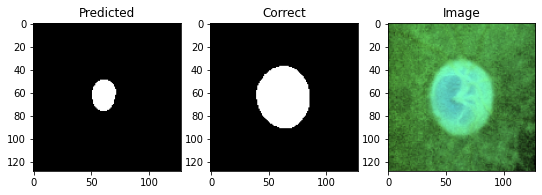

IOU: 0.22954194247722626
Dice: 0.3733779824194223
image #1


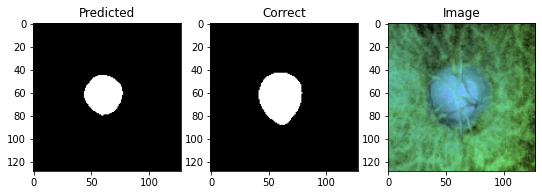

IOU: 0.6804364919662476
Dice: 0.8098330241187384
image #2


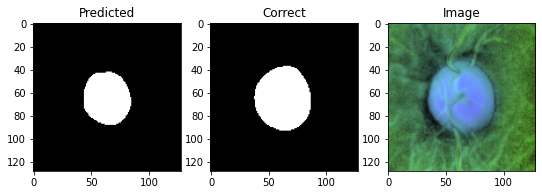

IOU: 0.7034611701965332
Dice: 0.8259198242723779
image #3


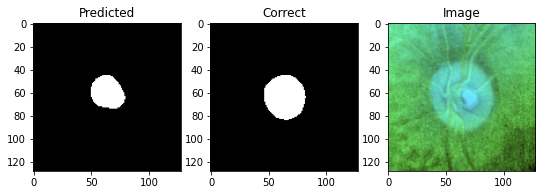

IOU: 0.6073732972145081
Dice: 0.7557339449541285
image #4


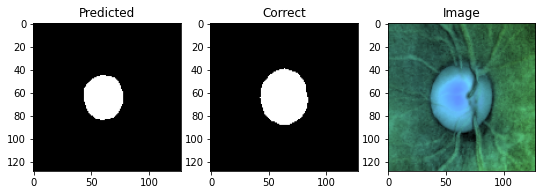

IOU: 0.6741645336151123
Dice: 0.8053742802303263
image #5


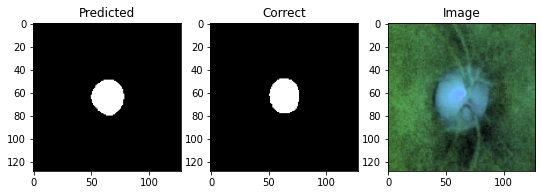

IOU: 0.8717579245567322
Dice: 0.9314857582755967
image #6


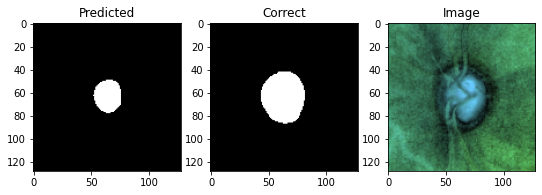

IOU: 0.4029850661754608
Dice: 0.574468085106383
image #7


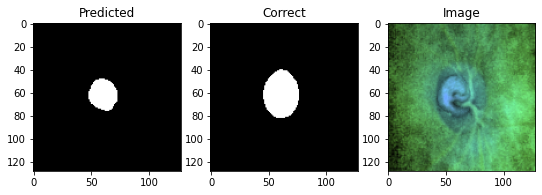

IOU: 0.5334665179252625
Dice: 0.6957654723127036
image #8


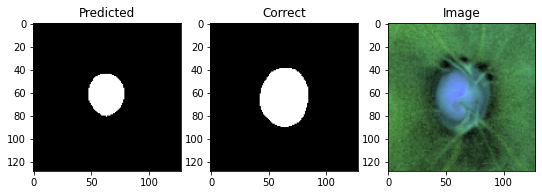

IOU: 0.522352933883667
Dice: 0.6862442040185471
image #9


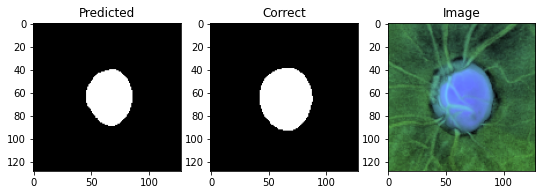

IOU: 0.769865870475769
Dice: 0.8699708454810495
image #10


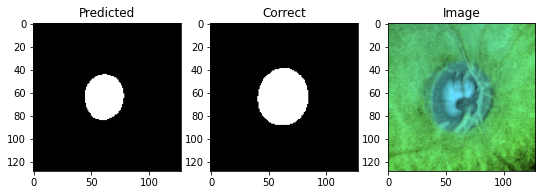

IOU: 0.615160346031189
Dice: 0.7617328519855595
image #11


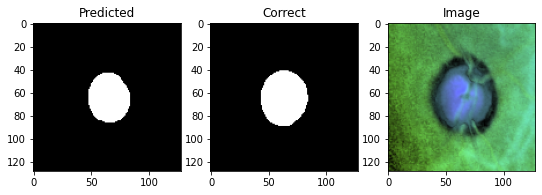

IOU: 0.8020765781402588
Dice: 0.890169247389269
image #12


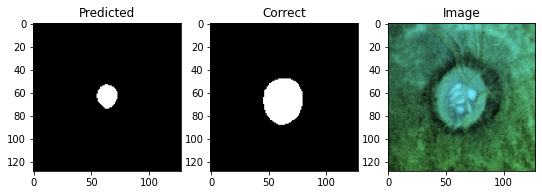

IOU: 0.2575896978378296
Dice: 0.40965618141916604
image #13


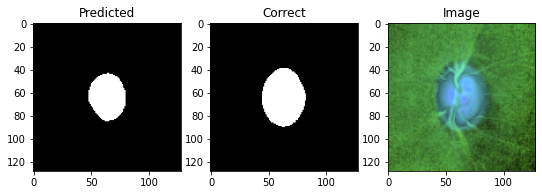

IOU: 0.694141685962677
Dice: 0.8194611982308002
image #14


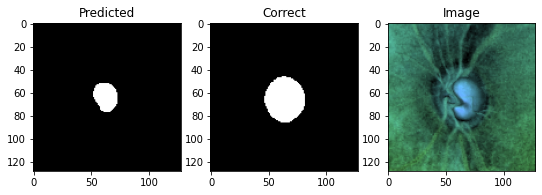

IOU: 0.3820224702358246
Dice: 0.5528455284552846
image #15


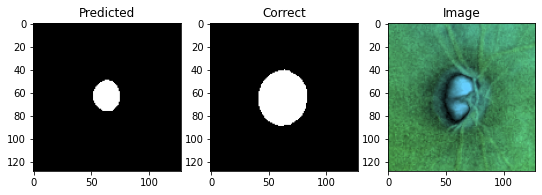

IOU: 0.30677542090415955
Dice: 0.46951512241958715
image #16


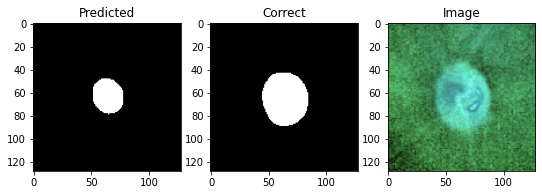

IOU: 0.4394557774066925
Dice: 0.610586011342155
image #17


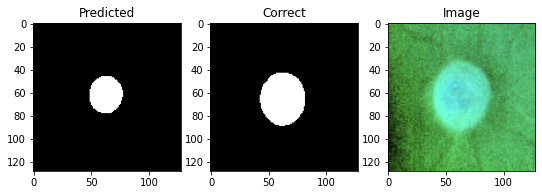

IOU: 0.5237420201301575
Dice: 0.6874418604651162
image #18


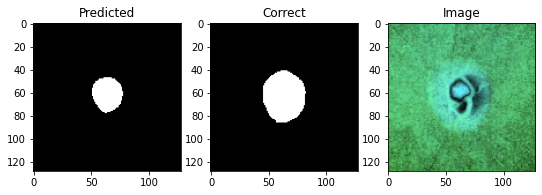

IOU: 0.4848954379558563
Dice: 0.6531038080333855
image #19


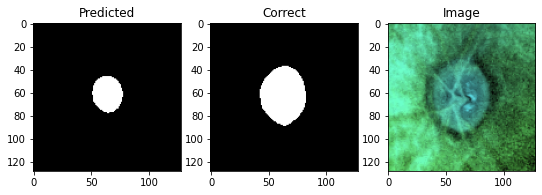

IOU: 0.420645147562027
Dice: 0.592188919164396
image #20


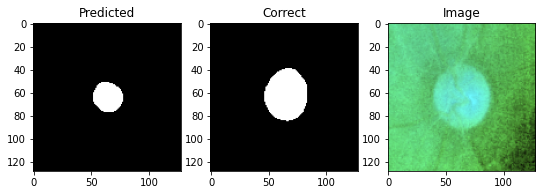

IOU: 0.4038022756576538
Dice: 0.5752979414951246
image #21


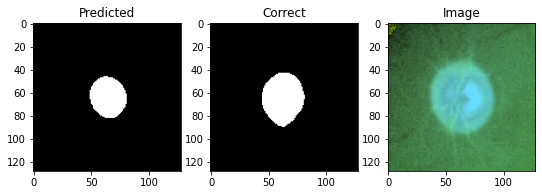

IOU: 0.6921278238296509
Dice: 0.8180561953017043
image #22


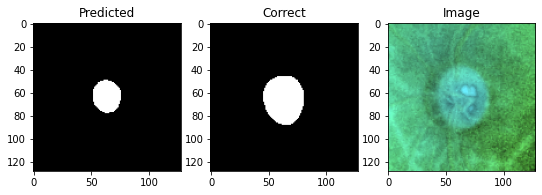

IOU: 0.46277496218681335
Dice: 0.6327356853672643
image #23


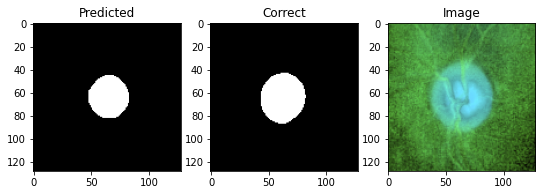

IOU: 0.7586727142333984
Dice: 0.8627787307032591
image #24


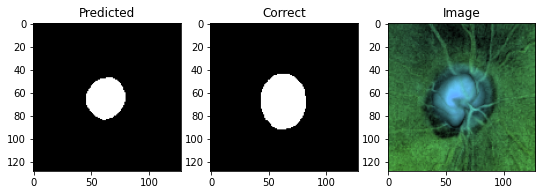

IOU: 0.6330214142799377
Dice: 0.7752762996316005
image #25


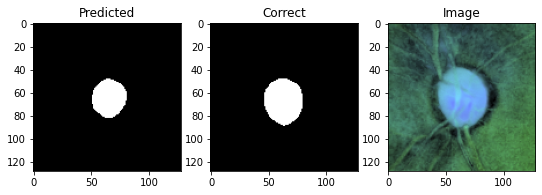

IOU: 0.7013953328132629
Dice: 0.8244942591580099
image #26


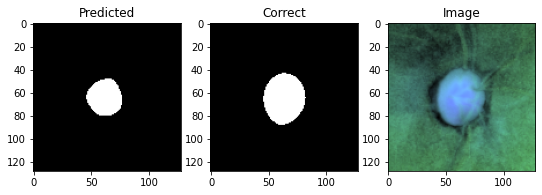

IOU: 0.6151368618011475
Dice: 0.7617148554336989
image #27


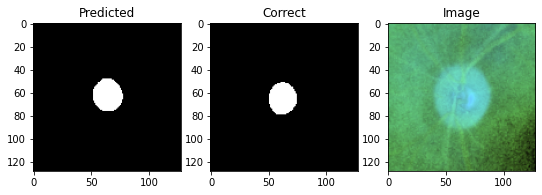

IOU: 0.7136222720146179
Dice: 0.8328816621499548
image #28


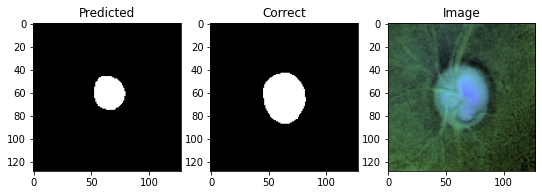

IOU: 0.4968253970146179
Dice: 0.6638388123011665
image #29


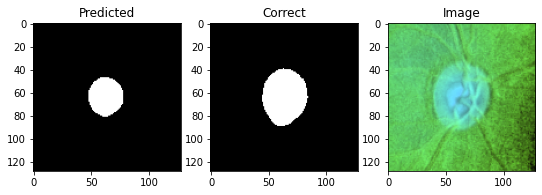

IOU: 0.53950035572052
Dice: 0.7008771929824561
image #30


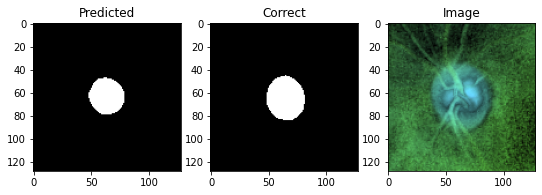

IOU: 0.7460317611694336
Dice: 0.8545454545454545
image #31


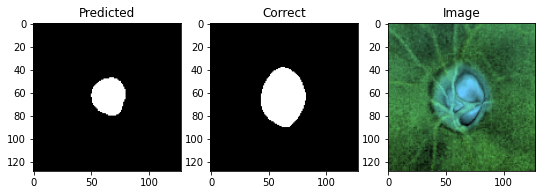

IOU: 0.5026595592498779
Dice: 0.6690265486725664
image #32


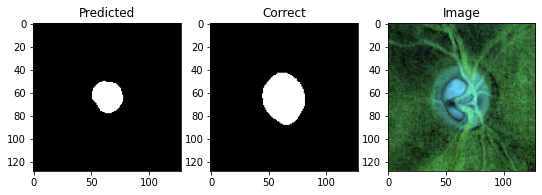

IOU: 0.4538893401622772
Dice: 0.6243794815223387
image #33


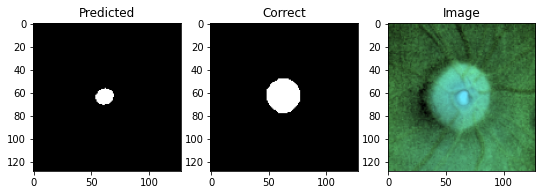

IOU: 0.25
Dice: 0.4
image #34


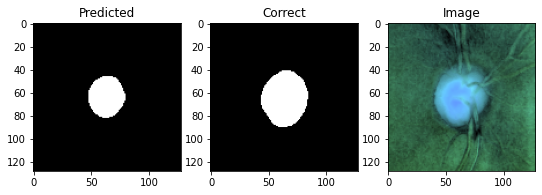

IOU: 0.5886243581771851
Dice: 0.7410491257285595
image #35


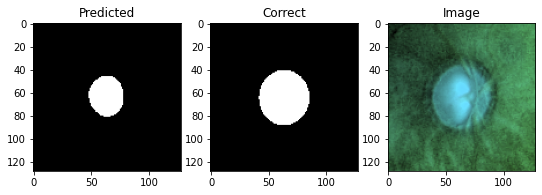

IOU: 0.5110429525375366
Dice: 0.6764108810393828
image #36


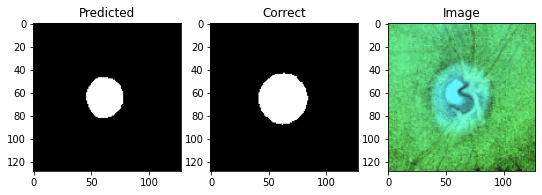

IOU: 0.6126809120178223
Dice: 0.7598290598290598
image #37


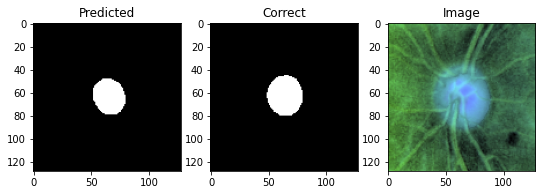

IOU: 0.8016335964202881
Dice: 0.8898963730569949
image #38


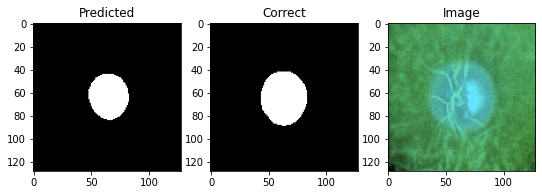

IOU: 0.7292370200157166
Dice: 0.843420538852011
image #39


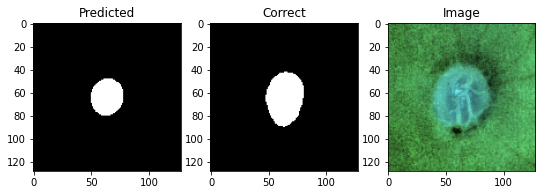

IOU: 0.6064189076423645
Dice: 0.7549947423764458
image #40


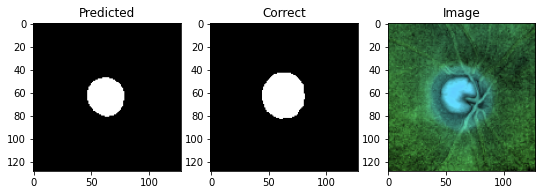

IOU: 0.7241674065589905
Dice: 0.8400198117880139
image #41


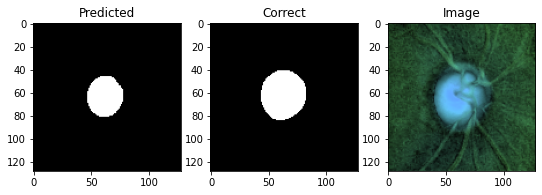

IOU: 0.6521084308624268
Dice: 0.7894257064721969
image #42


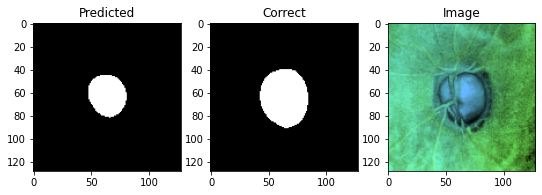

IOU: 0.5666266679763794
Dice: 0.7233716475095785
image #43


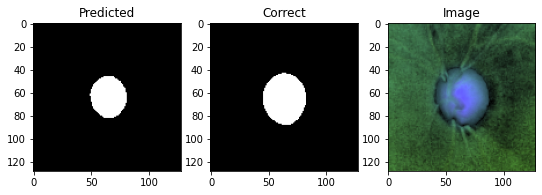

IOU: 0.685228168964386
Dice: 0.8132170720513997
image #44


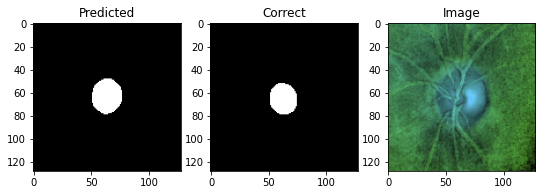

IOU: 0.7729393243789673
Dice: 0.8719298245614036
image #45


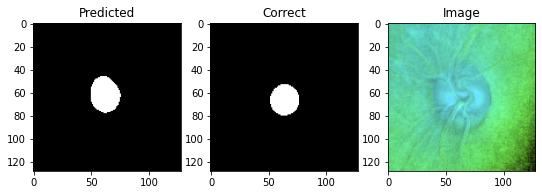

IOU: 0.6389280557632446
Dice: 0.7796901893287436
image #46


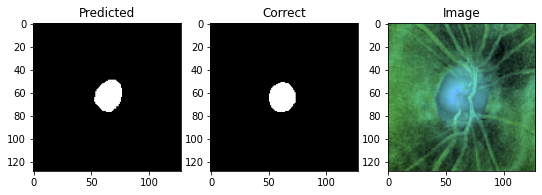

IOU: 0.6963350772857666
Dice: 0.8209876543209876
image #47


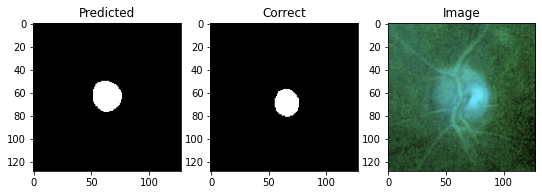

IOU: 0.5016233921051025
Dice: 0.6681081081081081
image #48


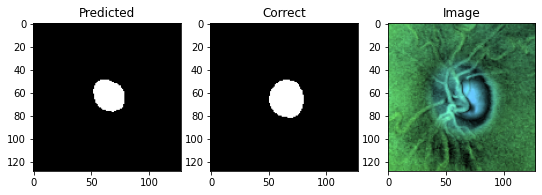

IOU: 0.7016229629516602
Dice: 0.8246515040352165
image #49


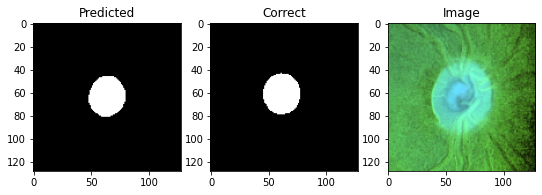

IOU: 0.8040609359741211
Dice: 0.891389983117614
image #50


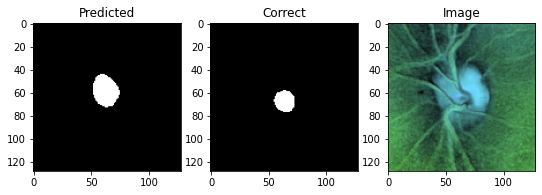

IOU: 0.3380782902240753
Dice: 0.5053191489361702


In [9]:
pred_iou, pred_dice, pred_cup = predict(hue_channel_test, X_test, Y_test, model, img_size)

In [10]:
print(np.mean(pred_iou))
print(np.mean(pred_dice))

0.58475935
0.7247938949111858


### Training and Test disc

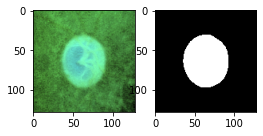

In [11]:
X_test, Z_test = next(data_generator(hue_channel_test, disc_test, disc_locations_test, img_size, train_or_test='test', batch_size=100, stationary=True))

num = 1
for i in range(num):
    fig = plt.figure(figsize=(4, 4))
    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(np.squeeze(X_test[i]), cmap=plt.cm.Greys_r)
    ax = fig.add_subplot(1, 2, 2)
    ax.imshow(np.squeeze(Z_test[i]), cmap=plt.cm.Greys_r)
    plt.show()
    print('=========================')

In [12]:
model_disc = create_compile_model(img_size)

history_disc = train(hue_channel_train, 
                     disc_train, 
                     disc_locations, 
                     'disc_hsv', 
                     model_disc, epochs, X_test, Z_test, img_size, spe)

Epoch 1/500
99/99 [==============================] - 59s 504ms/step - loss: 1.0364 - mean_IOU_gpu: 0.1471 - dice_metric: 0.2556 - val_loss: 0.9968 - val_mean_IOU_gpu: 9.0709e-04 - val_dice_metric: 0.0018
Epoch 2/500
99/99 [==============================] - 48s 490ms/step - loss: 1.0101 - mean_IOU_gpu: 0.1746 - dice_metric: 0.2965 - val_loss: 0.9856 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 3/500
99/99 [==============================] - 49s 493ms/step - loss: 0.9759 - mean_IOU_gpu: 0.1991 - dice_metric: 0.3305 - val_loss: 0.9717 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 4/500
99/99 [==============================] - 49s 500ms/step - loss: 0.9784 - mean_IOU_gpu: 0.2482 - dice_metric: 0.3955 - val_loss: 0.9506 - val_mean_IOU_gpu: 0.0034 - val_dice_metric: 0.0065
Epoch 5/500
99/99 [==============================] - 49s 497ms/step - loss: 0.9355 - mean_IOU_gpu: 0.3412 - dice_metric: 0.5037 - val_loss: 0.9077 - val_mean_IOU_gpu: 0.1517 - val_

Epoch 42/500
99/99 [==============================] - 49s 495ms/step - loss: 0.0648 - mean_IOU_gpu: 0.8619 - dice_metric: 0.9246 - val_loss: 1.1394 - val_mean_IOU_gpu: 0.1675 - val_dice_metric: 0.2665
Epoch 43/500
99/99 [==============================] - 49s 494ms/step - loss: 0.0635 - mean_IOU_gpu: 0.8648 - dice_metric: 0.9264 - val_loss: 1.0257 - val_mean_IOU_gpu: 0.1920 - val_dice_metric: 0.3010
Epoch 44/500
99/99 [==============================] - 49s 493ms/step - loss: 0.0580 - mean_IOU_gpu: 0.8737 - dice_metric: 0.9313 - val_loss: 1.0418 - val_mean_IOU_gpu: 0.1894 - val_dice_metric: 0.2973
Epoch 45/500
99/99 [==============================] - 49s 494ms/step - loss: 0.0599 - mean_IOU_gpu: 0.8703 - dice_metric: 0.9294 - val_loss: 1.3113 - val_mean_IOU_gpu: 0.1382 - val_dice_metric: 0.2236
Epoch 46/500
99/99 [==============================] - 49s 496ms/step - loss: 0.0667 - mean_IOU_gpu: 0.8580 - dice_metric: 0.9214 - val_loss: 1.0248 - val_mean_IOU_gpu: 0.1893 - val_dice_metric: 0.

Epoch 83/500
99/99 [==============================] - 49s 496ms/step - loss: 0.0563 - mean_IOU_gpu: 0.8780 - dice_metric: 0.9336 - val_loss: 1.2277 - val_mean_IOU_gpu: 0.1589 - val_dice_metric: 0.2546
Epoch 84/500
99/99 [==============================] - 50s 502ms/step - loss: 0.0504 - mean_IOU_gpu: 0.8855 - dice_metric: 0.9381 - val_loss: 1.0840 - val_mean_IOU_gpu: 0.1889 - val_dice_metric: 0.2968
Epoch 85/500
99/99 [==============================] - 49s 494ms/step - loss: 0.0564 - mean_IOU_gpu: 0.8743 - dice_metric: 0.9316 - val_loss: 1.2685 - val_mean_IOU_gpu: 0.1496 - val_dice_metric: 0.2413
Epoch 86/500
99/99 [==============================] - 50s 501ms/step - loss: 0.0508 - mean_IOU_gpu: 0.8862 - dice_metric: 0.9388 - val_loss: 1.1855 - val_mean_IOU_gpu: 0.1633 - val_dice_metric: 0.2612
Epoch 87/500
99/99 [==============================] - 48s 489ms/step - loss: 0.0456 - mean_IOU_gpu: 0.8949 - dice_metric: 0.9441 - val_loss: 1.0548 - val_mean_IOU_gpu: 0.1923 - val_dice_metric: 0.

Epoch 124/500
99/99 [==============================] - 51s 511ms/step - loss: 0.0503 - mean_IOU_gpu: 0.8863 - dice_metric: 0.9384 - val_loss: 1.3476 - val_mean_IOU_gpu: 0.1384 - val_dice_metric: 0.2247
Epoch 125/500
99/99 [==============================] - 48s 486ms/step - loss: 0.0516 - mean_IOU_gpu: 0.8819 - dice_metric: 0.9363 - val_loss: 1.1830 - val_mean_IOU_gpu: 0.1708 - val_dice_metric: 0.2713
Epoch 126/500
99/99 [==============================] - 49s 495ms/step - loss: 0.0485 - mean_IOU_gpu: 0.8892 - dice_metric: 0.9404 - val_loss: 1.1928 - val_mean_IOU_gpu: 0.1673 - val_dice_metric: 0.2666
Epoch 127/500
99/99 [==============================] - 49s 496ms/step - loss: 0.0469 - mean_IOU_gpu: 0.8917 - dice_metric: 0.9421 - val_loss: 1.1526 - val_mean_IOU_gpu: 0.1754 - val_dice_metric: 0.2782
Epoch 128/500
99/99 [==============================] - 49s 494ms/step - loss: 0.0488 - mean_IOU_gpu: 0.8885 - dice_metric: 0.9400 - val_loss: 1.0351 - val_mean_IOU_gpu: 0.2031 - val_dice_metri

99/99 [==============================] - 48s 487ms/step - loss: 0.0590 - mean_IOU_gpu: 0.8756 - dice_metric: 0.9305 - val_loss: 1.0755 - val_mean_IOU_gpu: 0.1961 - val_dice_metric: 0.3063
Epoch 165/500
99/99 [==============================] - 48s 487ms/step - loss: 0.0524 - mean_IOU_gpu: 0.8834 - dice_metric: 0.9364 - val_loss: 1.0546 - val_mean_IOU_gpu: 0.2019 - val_dice_metric: 0.3139
Epoch 166/500
99/99 [==============================] - 48s 482ms/step - loss: 0.0437 - mean_IOU_gpu: 0.8995 - dice_metric: 0.9461 - val_loss: 1.2017 - val_mean_IOU_gpu: 0.1677 - val_dice_metric: 0.2669
Epoch 167/500
99/99 [==============================] - 48s 487ms/step - loss: 0.0503 - mean_IOU_gpu: 0.8883 - dice_metric: 0.9394 - val_loss: 1.3192 - val_mean_IOU_gpu: 0.1457 - val_dice_metric: 0.2355
Epoch 168/500
99/99 [==============================] - 48s 483ms/step - loss: 0.0435 - mean_IOU_gpu: 0.8980 - dice_metric: 0.9456 - val_loss: 1.1149 - val_mean_IOU_gpu: 0.1843 - val_dice_metric: 0.2904
Epoc

Epoch 205/500
99/99 [==============================] - 48s 480ms/step - loss: 0.0430 - mean_IOU_gpu: 0.9004 - dice_metric: 0.9467 - val_loss: 1.2117 - val_mean_IOU_gpu: 0.1681 - val_dice_metric: 0.2669
Epoch 206/500
99/99 [==============================] - 47s 474ms/step - loss: 0.0396 - mean_IOU_gpu: 0.9063 - dice_metric: 0.9503 - val_loss: 1.0609 - val_mean_IOU_gpu: 0.2022 - val_dice_metric: 0.3136
Epoch 207/500
99/99 [==============================] - 48s 483ms/step - loss: 0.0455 - mean_IOU_gpu: 0.8951 - dice_metric: 0.9437 - val_loss: 1.1709 - val_mean_IOU_gpu: 0.1758 - val_dice_metric: 0.2773
Epoch 208/500
99/99 [==============================] - 48s 487ms/step - loss: 0.0455 - mean_IOU_gpu: 0.8930 - dice_metric: 0.9428 - val_loss: 1.2072 - val_mean_IOU_gpu: 0.1697 - val_dice_metric: 0.2691
Epoch 209/500
99/99 [==============================] - 48s 485ms/step - loss: 0.0458 - mean_IOU_gpu: 0.8957 - dice_metric: 0.9437 - val_loss: 1.2298 - val_mean_IOU_gpu: 0.1645 - val_dice_metri

99/99 [==============================] - 49s 490ms/step - loss: 0.0441 - mean_IOU_gpu: 0.8980 - dice_metric: 0.9454 - val_loss: 1.2754 - val_mean_IOU_gpu: 0.1554 - val_dice_metric: 0.2489
Epoch 246/500
99/99 [==============================] - 50s 501ms/step - loss: 0.0417 - mean_IOU_gpu: 0.9019 - dice_metric: 0.9477 - val_loss: 1.1574 - val_mean_IOU_gpu: 0.1792 - val_dice_metric: 0.2823
Epoch 247/500
99/99 [==============================] - 47s 475ms/step - loss: 0.0429 - mean_IOU_gpu: 0.9002 - dice_metric: 0.9466 - val_loss: 1.1927 - val_mean_IOU_gpu: 0.1707 - val_dice_metric: 0.2704
Epoch 248/500
99/99 [==============================] - 48s 485ms/step - loss: 0.0473 - mean_IOU_gpu: 0.8970 - dice_metric: 0.9434 - val_loss: 0.8233 - val_mean_IOU_gpu: 0.2736 - val_dice_metric: 0.4041
Epoch 249/500
99/99 [==============================] - 48s 486ms/step - loss: 0.0420 - mean_IOU_gpu: 0.9013 - dice_metric: 0.9473 - val_loss: 1.1542 - val_mean_IOU_gpu: 0.1794 - val_dice_metric: 0.2827
Epoc

Epoch 286/500
99/99 [==============================] - 49s 493ms/step - loss: 0.0406 - mean_IOU_gpu: 0.9042 - dice_metric: 0.9490 - val_loss: 0.9366 - val_mean_IOU_gpu: 0.2371 - val_dice_metric: 0.3589
Epoch 287/500
99/99 [==============================] - 48s 486ms/step - loss: 0.0423 - mean_IOU_gpu: 0.9005 - dice_metric: 0.9467 - val_loss: 1.0155 - val_mean_IOU_gpu: 0.2138 - val_dice_metric: 0.3289
Epoch 288/500
99/99 [==============================] - 47s 477ms/step - loss: 0.0394 - mean_IOU_gpu: 0.9060 - dice_metric: 0.9501 - val_loss: 1.2241 - val_mean_IOU_gpu: 0.1632 - val_dice_metric: 0.2599
Epoch 289/500
99/99 [==============================] - 52s 521ms/step - loss: 0.0431 - mean_IOU_gpu: 0.8987 - dice_metric: 0.9457 - val_loss: 0.9954 - val_mean_IOU_gpu: 0.2197 - val_dice_metric: 0.3365
Epoch 290/500
99/99 [==============================] - 50s 508ms/step - loss: 0.0419 - mean_IOU_gpu: 0.9005 - dice_metric: 0.9469 - val_loss: 1.1338 - val_mean_IOU_gpu: 0.1838 - val_dice_metri

99/99 [==============================] - 34s 348ms/step - loss: 0.0432 - mean_IOU_gpu: 0.8997 - dice_metric: 0.9464 - val_loss: 1.0172 - val_mean_IOU_gpu: 0.2151 - val_dice_metric: 0.3301
Epoch 327/500
99/99 [==============================] - 34s 347ms/step - loss: 0.0402 - mean_IOU_gpu: 0.9044 - dice_metric: 0.9491 - val_loss: 1.1666 - val_mean_IOU_gpu: 0.1780 - val_dice_metric: 0.2802
Epoch 328/500
99/99 [==============================] - 34s 343ms/step - loss: 0.0395 - mean_IOU_gpu: 0.9060 - dice_metric: 0.9501 - val_loss: 1.0405 - val_mean_IOU_gpu: 0.2090 - val_dice_metric: 0.3220
Epoch 329/500
99/99 [==============================] - 34s 345ms/step - loss: 0.0418 - mean_IOU_gpu: 0.9011 - dice_metric: 0.9473 - val_loss: 1.0767 - val_mean_IOU_gpu: 0.1995 - val_dice_metric: 0.3095
Epoch 330/500
99/99 [==============================] - 34s 341ms/step - loss: 0.0416 - mean_IOU_gpu: 0.9032 - dice_metric: 0.9482 - val_loss: 0.9973 - val_mean_IOU_gpu: 0.2193 - val_dice_metric: 0.3356
Epoc

Epoch 367/500
99/99 [==============================] - 34s 339ms/step - loss: 0.0411 - mean_IOU_gpu: 0.9043 - dice_metric: 0.9492 - val_loss: 0.8573 - val_mean_IOU_gpu: 0.2628 - val_dice_metric: 0.3900
Epoch 368/500
99/99 [==============================] - 34s 344ms/step - loss: 0.0410 - mean_IOU_gpu: 0.9028 - dice_metric: 0.9483 - val_loss: 0.9791 - val_mean_IOU_gpu: 0.2227 - val_dice_metric: 0.3395
Epoch 369/500
99/99 [==============================] - 35s 354ms/step - loss: 0.0365 - mean_IOU_gpu: 0.9120 - dice_metric: 0.9535 - val_loss: 0.8260 - val_mean_IOU_gpu: 0.2735 - val_dice_metric: 0.4024
Epoch 370/500
99/99 [==============================] - 34s 339ms/step - loss: 0.0395 - mean_IOU_gpu: 0.9058 - dice_metric: 0.9500 - val_loss: 0.9268 - val_mean_IOU_gpu: 0.2406 - val_dice_metric: 0.3623
Epoch 371/500
99/99 [==============================] - 34s 340ms/step - loss: 0.0373 - mean_IOU_gpu: 0.9114 - dice_metric: 0.9528 - val_loss: 0.8285 - val_mean_IOU_gpu: 0.2729 - val_dice_metri

99/99 [==============================] - 34s 341ms/step - loss: 0.0400 - mean_IOU_gpu: 0.9048 - dice_metric: 0.9494 - val_loss: 0.8364 - val_mean_IOU_gpu: 0.2682 - val_dice_metric: 0.3970
Epoch 408/500
99/99 [==============================] - 34s 343ms/step - loss: 0.0413 - mean_IOU_gpu: 0.9046 - dice_metric: 0.9487 - val_loss: 0.8140 - val_mean_IOU_gpu: 0.2759 - val_dice_metric: 0.4062
Epoch 409/500
99/99 [==============================] - 34s 341ms/step - loss: 0.0410 - mean_IOU_gpu: 0.9042 - dice_metric: 0.9489 - val_loss: 0.9268 - val_mean_IOU_gpu: 0.2412 - val_dice_metric: 0.3641
Epoch 410/500
99/99 [==============================] - 34s 344ms/step - loss: 0.0382 - mean_IOU_gpu: 0.9080 - dice_metric: 0.9513 - val_loss: 0.7632 - val_mean_IOU_gpu: 0.2955 - val_dice_metric: 0.4285
Epoch 411/500
99/99 [==============================] - 34s 342ms/step - loss: 0.0348 - mean_IOU_gpu: 0.9153 - dice_metric: 0.9554 - val_loss: 0.7290 - val_mean_IOU_gpu: 0.3112 - val_dice_metric: 0.4466
Epoc

Epoch 448/500
99/99 [==============================] - 34s 343ms/step - loss: 0.0413 - mean_IOU_gpu: 0.9030 - dice_metric: 0.9484 - val_loss: 0.6425 - val_mean_IOU_gpu: 0.3446 - val_dice_metric: 0.4853
Epoch 449/500
99/99 [==============================] - 34s 341ms/step - loss: 0.0334 - mean_IOU_gpu: 0.9195 - dice_metric: 0.9577 - val_loss: 0.7272 - val_mean_IOU_gpu: 0.3080 - val_dice_metric: 0.4446
Epoch 450/500
99/99 [==============================] - 34s 343ms/step - loss: 0.0362 - mean_IOU_gpu: 0.9130 - dice_metric: 0.9540 - val_loss: 0.7905 - val_mean_IOU_gpu: 0.2844 - val_dice_metric: 0.4171
Epoch 451/500
99/99 [==============================] - 34s 345ms/step - loss: 0.0405 - mean_IOU_gpu: 0.9033 - dice_metric: 0.9485 - val_loss: 0.7357 - val_mean_IOU_gpu: 0.3061 - val_dice_metric: 0.4420
Epoch 452/500
99/99 [==============================] - 34s 340ms/step - loss: 0.0429 - mean_IOU_gpu: 0.9026 - dice_metric: 0.9471 - val_loss: 0.8050 - val_mean_IOU_gpu: 0.2787 - val_dice_metri

99/99 [==============================] - 83s 841ms/step - loss: 0.0404 - mean_IOU_gpu: 0.9064 - dice_metric: 0.9497 - val_loss: 0.6809 - val_mean_IOU_gpu: 0.3286 - val_dice_metric: 0.4683
Epoch 489/500
99/99 [==============================] - 83s 841ms/step - loss: 0.0469 - mean_IOU_gpu: 0.8968 - dice_metric: 0.9432 - val_loss: 0.7445 - val_mean_IOU_gpu: 0.3004 - val_dice_metric: 0.4358
Epoch 490/500
99/99 [==============================] - 87s 876ms/step - loss: 0.0404 - mean_IOU_gpu: 0.9054 - dice_metric: 0.9492 - val_loss: 0.5844 - val_mean_IOU_gpu: 0.3759 - val_dice_metric: 0.5197
Epoch 491/500
99/99 [==============================] - 86s 868ms/step - loss: 0.0384 - mean_IOU_gpu: 0.9088 - dice_metric: 0.9514 - val_loss: 0.6450 - val_mean_IOU_gpu: 0.3428 - val_dice_metric: 0.4839
Epoch 492/500
99/99 [==============================] - 85s 859ms/step - loss: 0.0384 - mean_IOU_gpu: 0.9091 - dice_metric: 0.9516 - val_loss: 0.6378 - val_mean_IOU_gpu: 0.3468 - val_dice_metric: 0.4880
Epoc

image #0


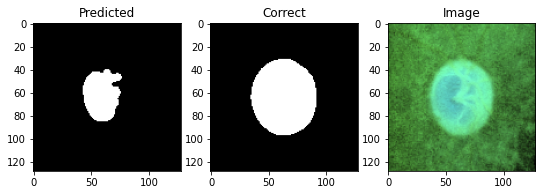

IOU: 0.381916344165802
Dice: 0.552734375
image #1


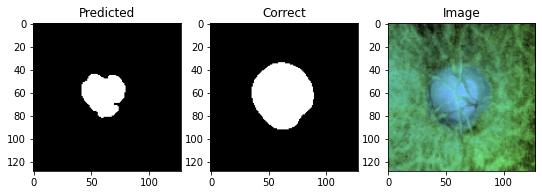

IOU: 0.44808271527290344
Dice: 0.618863433501934
image #2


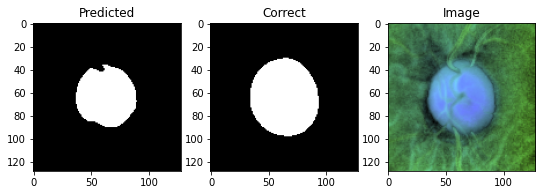

IOU: 0.6866857409477234
Dice: 0.8142426525998493
image #3


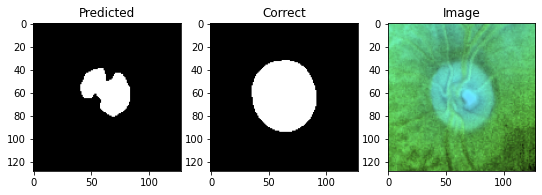

IOU: 0.41973060369491577
Dice: 0.5912820512820512
image #4


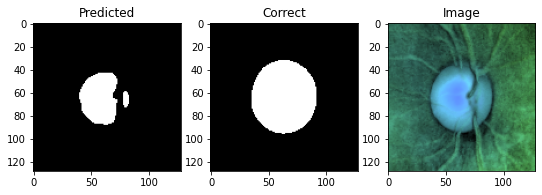

IOU: 0.4380717873573303
Dice: 0.6092488377783215
image #5


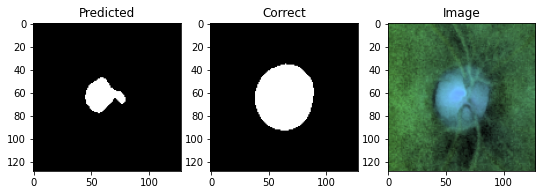

IOU: 0.2702229917049408
Dice: 0.42547332185886405
image #6


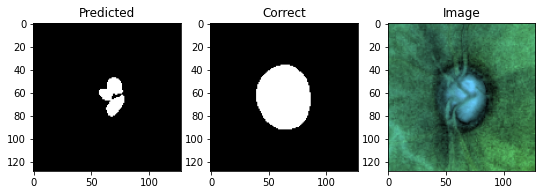

IOU: 0.2036415934562683
Dice: 0.33837579617834396
image #7


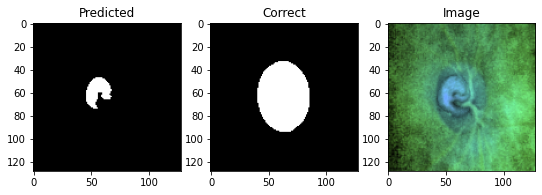

IOU: 0.17048579454421997
Dice: 0.2913077525450274
image #8


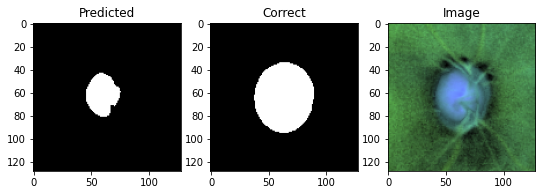

IOU: 0.320877343416214
Dice: 0.4858548585485855
image #9


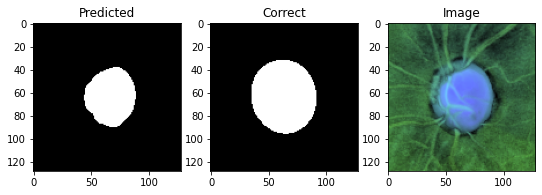

IOU: 0.6089856028556824
Dice: 0.7569808027923212
image #10


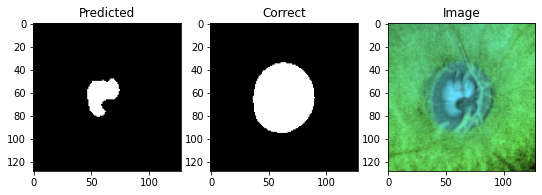

IOU: 0.2267032116651535
Dice: 0.36961378870092565
image #11


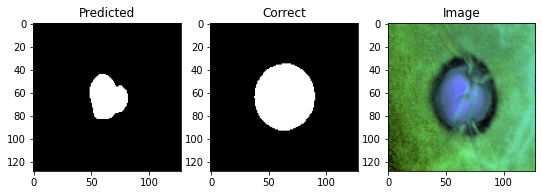

IOU: 0.3973872661590576
Dice: 0.5687575392038601
image #12


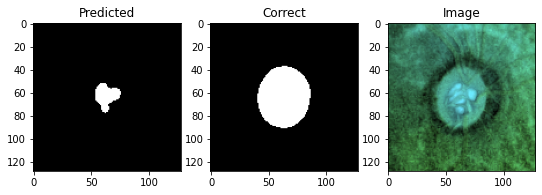

IOU: 0.17490890622138977
Dice: 0.2977403633141338
image #13


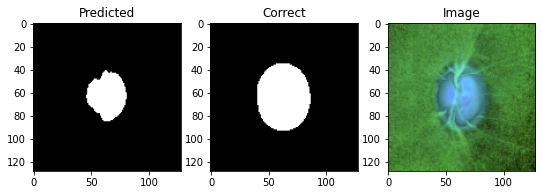

IOU: 0.494907408952713
Dice: 0.6621244967482193
image #14


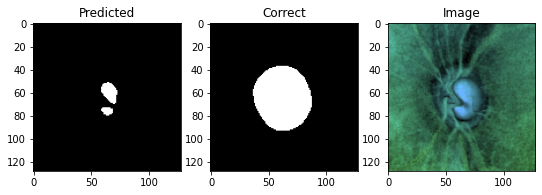

IOU: 0.10476190596818924
Dice: 0.1896551724137931
image #15


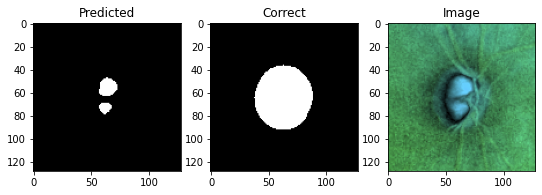

IOU: 0.12477148324251175
Dice: 0.22186103210077204
image #16


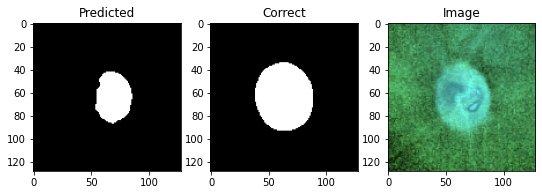

IOU: 0.46088793873786926
Dice: 0.6309696092619392
image #17


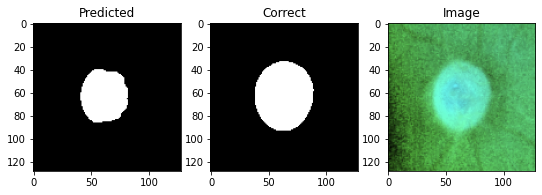

IOU: 0.6350395083427429
Dice: 0.7767879867650802
image #18


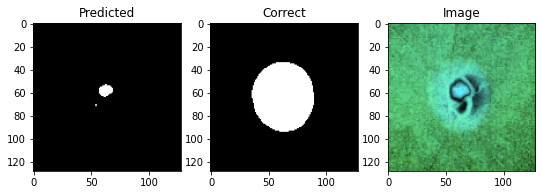

IOU: 0.0376766100525856
Dice: 0.07261724659606657
image #19


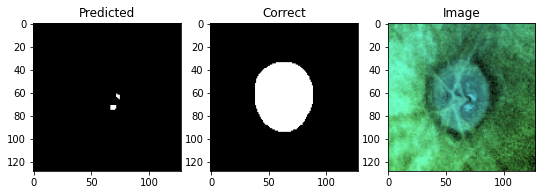

IOU: 0.011899877339601517
Dice: 0.023519870235198703
image #20


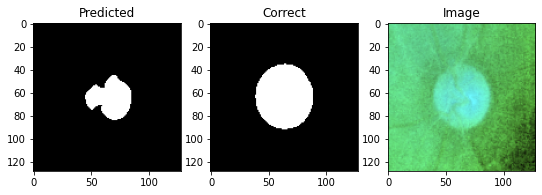

IOU: 0.45396825671195984
Dice: 0.6244541484716157
image #21


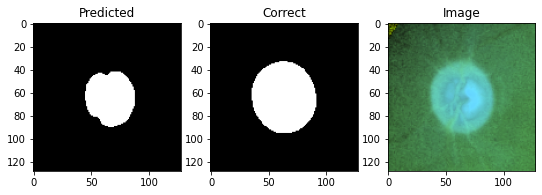

IOU: 0.5923217535018921
Dice: 0.7439724454649828
image #22


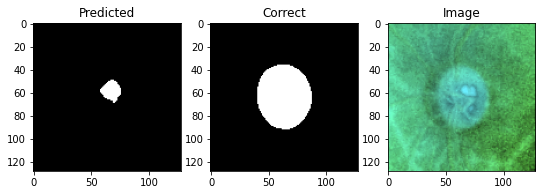

IOU: 0.11121764034032822
Dice: 0.2001725625539258
image #23


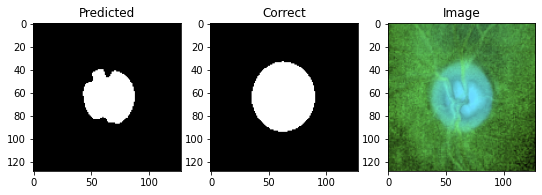

IOU: 0.6111111044883728
Dice: 0.7586206896551724
image #24


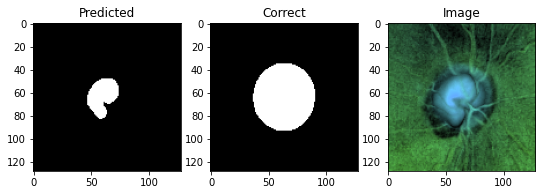

IOU: 0.2523176074028015
Dice: 0.40296105568072094
image #25


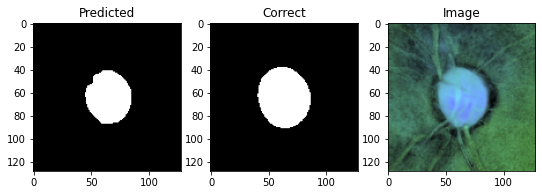

IOU: 0.75
Dice: 0.8571428571428571
image #26


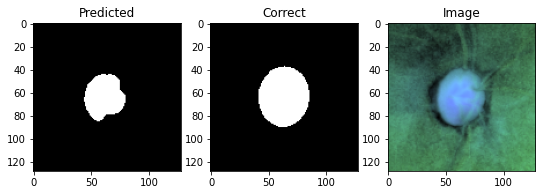

IOU: 0.5866076350212097
Dice: 0.7394489012905476
image #27


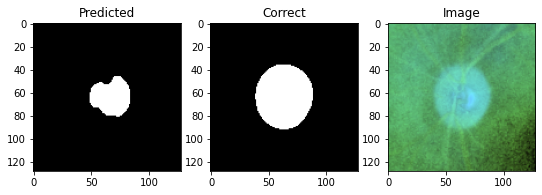

IOU: 0.4087391793727875
Dice: 0.5802907915993538
image #28


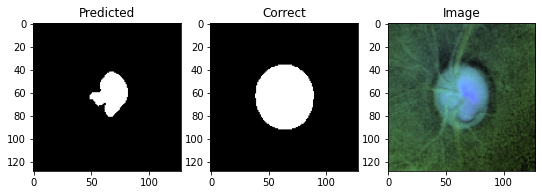

IOU: 0.33525756001472473
Dice: 0.5021616228799468
image #29


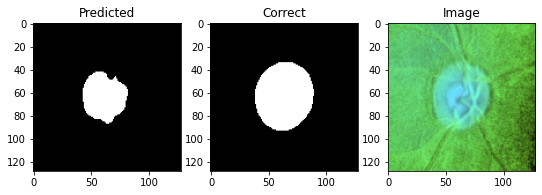

IOU: 0.537162184715271
Dice: 0.6989010989010989
image #30


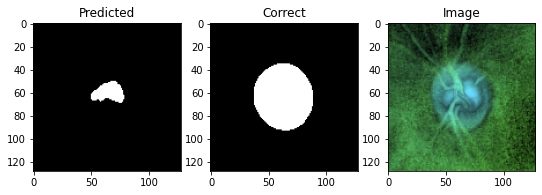

IOU: 0.15717345476150513
Dice: 0.2716506291635825
image #31


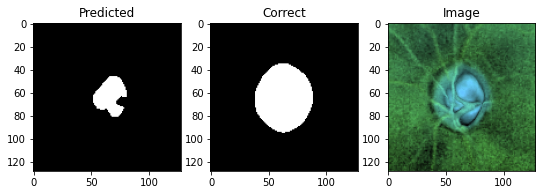

IOU: 0.2883516550064087
Dice: 0.4476287956328898
image #32


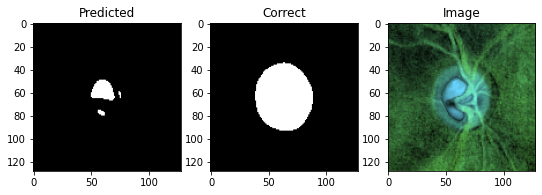

IOU: 0.12999999523162842
Dice: 0.23008849557522124
image #33


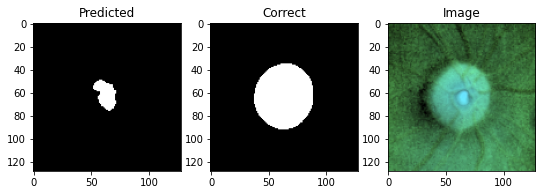

IOU: 0.14873141050338745
Dice: 0.25894897182025894
image #34


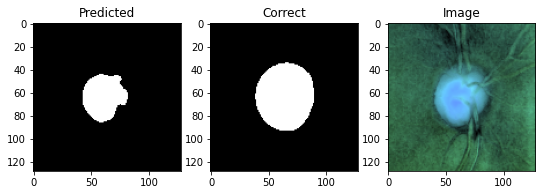

IOU: 0.5016977787017822
Dice: 0.6681741096664783
image #35


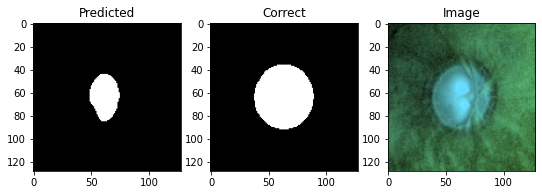

IOU: 0.3464776277542114
Dice: 0.514642974662718
image #36


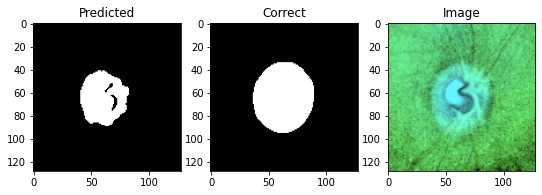

IOU: 0.5668889880180359
Dice: 0.7235853780671007
image #37


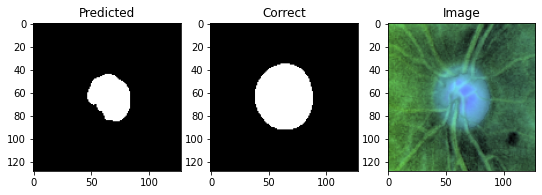

IOU: 0.48438188433647156
Dice: 0.6526378186129224
image #38


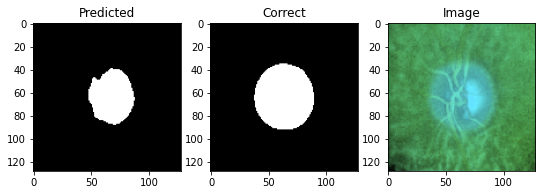

IOU: 0.6109448671340942
Dice: 0.7584925690021231
image #39


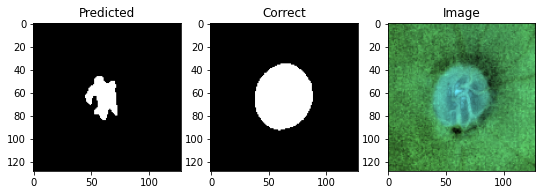

IOU: 0.28737691044807434
Dice: 0.44645340751043117
image #40


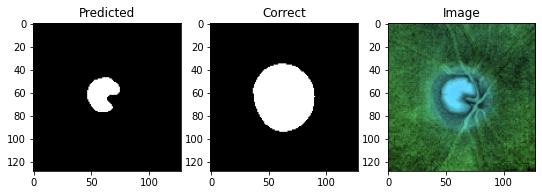

IOU: 0.2402142584323883
Dice: 0.387375415282392
image #41


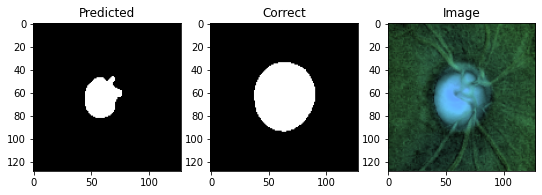

IOU: 0.33360224962234497
Dice: 0.500302480338778
image #42


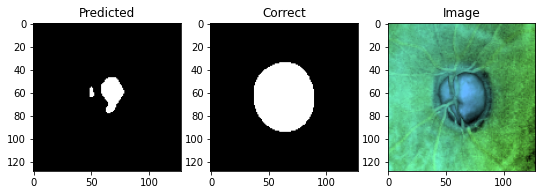

IOU: 0.1678599864244461
Dice: 0.28746594005449594
image #43


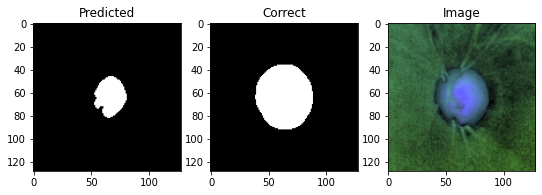

IOU: 0.32032668590545654
Dice: 0.4852233676975945
image #44


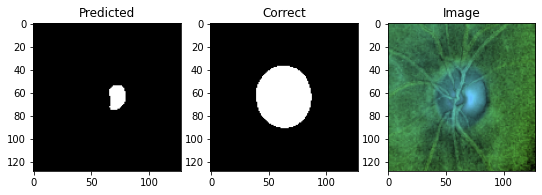

IOU: 0.12047012895345688
Dice: 0.21503496503496503
image #45


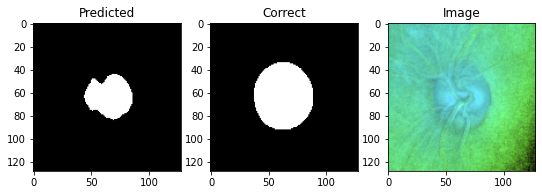

IOU: 0.490939736366272
Dice: 0.6585641605426795
image #46


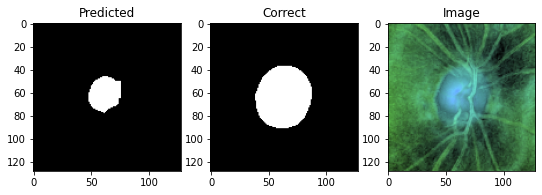

IOU: 0.320899099111557
Dice: 0.48587979724837077
image #47


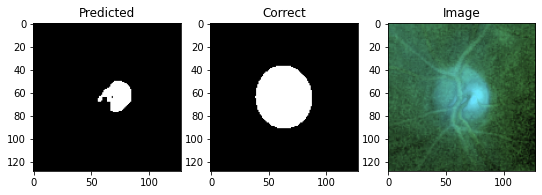

IOU: 0.2304389327764511
Dice: 0.374563784412563
image #48


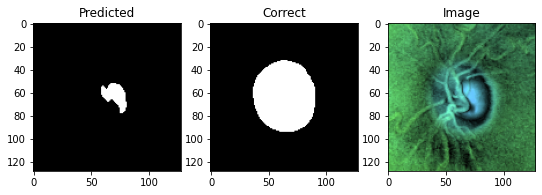

IOU: 0.12265566736459732
Dice: 0.21850985633144002
image #49


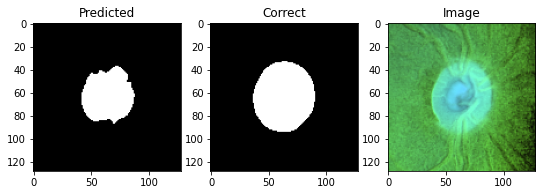

IOU: 0.6593835353851318
Dice: 0.7947331295556078
image #50


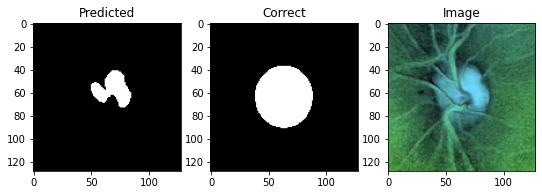

IOU: 0.3013245165348053
Dice: 0.4631043256997455


In [13]:
pred_iou, pred_dice, pred_disc = predict(hue_channel_test, X_test, Z_test, model_disc, img_size)

In [14]:
print(np.mean(pred_iou))
print(np.mean(pred_dice))

0.35463703
0.49508230456819347


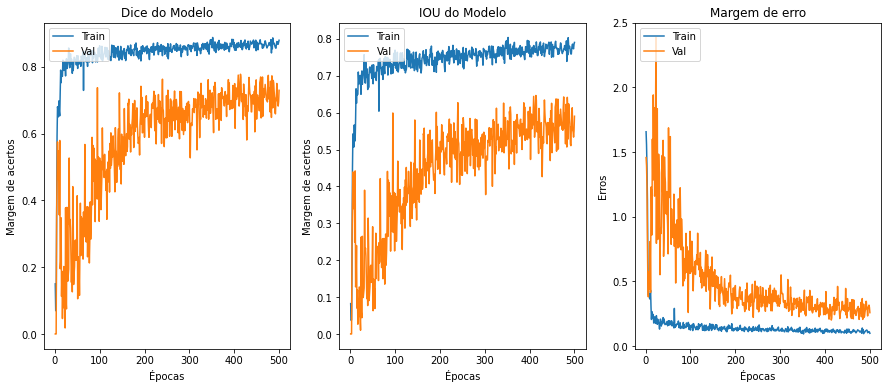

In [15]:
plot_results(history_cup, epochs)

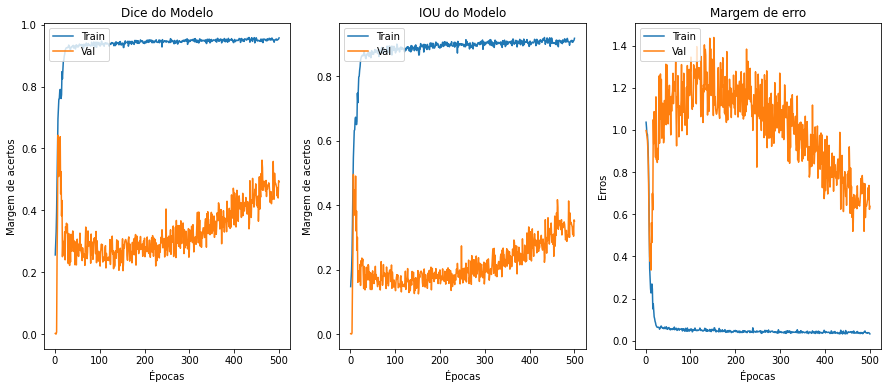

In [16]:
plot_results(history_disc, epochs)

In [17]:
result, diametros_cup, diametros_disc = create_table_result(pred_cup, pred_disc, test_idx)

image #0 - cdr = 0.6002235319085708
image #1 - cdr = 0.9046072904468094
image #2 - cdr = 0.8731672645100723
image #3 - cdr = 0.6748044727654389
image #4 - cdr = 0.817137678885576
image #5 - cdr = 0.9347293280398277
image #6 - cdr = 0.9088740854487898
image #7 - cdr = 1.0614584976277313
image #8 - cdr = 1.0109932806263764
image #9 - cdr = 0.9487375159414388
image #10 - cdr = 1.1565509945219592
image #11 - cdr = 1.1264947658497524
image #12 - cdr = 0.8564285916617496
image #13 - cdr = 0.9963351941194196
image #14 - cdr = 1.3721978264406793
image #15 - cdr = 1.625192923659438
image #16 - cdr = 0.7004488779873335
image #17 - cdr = 0.6913189367432536
image #18 - cdr = 2.4625560680287486
image #19 - cdr = 5.84439230601762
image #20 - cdr = 0.6928154060719286
image #21 - cdr = 0.7509919624029392
image #22 - cdr = 1.5484625138446255
image #23 - cdr = 0.8016888335157982
image #24 - cdr = 1.0068727289285169
image #25 - cdr = 0.7249779165992954
image #26 - cdr = 0.8091970425554488
image #27 - cdr

In [18]:
pd.DataFrame(data= result)

cdr       area
0   0.600224   0.393993
1   0.904607   0.839423
2   0.873167   0.695974
3   0.674804   0.572420
4   0.817138   0.842570
5   0.934729   1.092233
6   0.908874   1.270588
7   1.061458   1.435484
8   1.010993   1.124051
9   0.948738   0.859942
10  1.156551   1.822107
11  1.126495   1.312831
12  0.856429   0.833333
13  0.996335   0.953227
14  1.372198   1.766234
15  1.625193   1.791209
16  0.700449   0.592661
17  0.691319   0.484273
18  2.462556   6.520833
19  5.844392  22.482759
20  0.692815   0.530470
21  0.750992   0.548148
22  1.548463   2.357759
23  0.801689   0.640152
24  1.006873   1.512780
25  0.724978   0.548936
26  0.809197   0.721698
27  0.791006   0.639198
28  0.827929   0.829139
29  0.786886   0.628145
30  1.065042   2.073569
31  0.955791   1.152439
32  1.340850   1.892977
33  0.568854   0.502941
34  0.860646   0.752961
35  0.877523   1.065217
36  0.763338   0.615225
37  0.762472   0.628520
38  0.846308   0.755773
39  0.913513   1.118380
40  1.091866   1.454545
41  0.976235   1.047158
42  1.239723   2.236967
43  1.057899   1.254958
44  1.362026   2.556911
45  0.764002   0.539914
46  0.901261   0.749627
47  0.989461   1.093168
48  1.066227   1.798165
49  0.729876   0.519527
50  0.840979   0.766091

In [19]:
cup = np.array(diametros_cup)
disc = np.array(diametros_disc)
pd.DataFrame(data={'cup - dm': cup[:,0], 'cup - dM': cup[:,1], 'disc - dm': disc[:,0], 'disc - dM': disc[:,1]})

cup - dm   cup - dM  disc - dm  disc - dM
0   20.789213  27.629875  32.813705  46.032642
1   32.942383  34.211502  36.575768  37.819176
2   41.150486  46.876522  51.792774  53.685616
3   27.001730  31.795517  33.994984  47.118118
4   34.510986  38.990173  33.291809  47.715549
5   28.136257  30.988329  28.083870  33.152195
6   23.748957  29.288452  19.104042  32.224983
7   24.705151  27.867559  20.568001  26.254026
8   31.220840  36.627083  28.405878  36.228809
9   39.756824  48.317146  44.007294  50.927834
10  33.909584  39.825928  24.959217  34.435081
11  36.309647  43.715778  32.671070  38.806908
12  17.721827  20.414200  21.354692  23.836430
13  31.946716  41.042660  33.886951  41.193626
14  20.151752  26.218843  12.398157  19.107189
15  23.231504  27.011551  15.165908  16.620520
16  26.430099  31.512579  31.473803  44.989120
17  29.176880  32.538570  41.601250  47.067379
18  26.469164  30.666979   9.798262  12.453312
19  26.276262  31.899240   4.400647   5.458094
20  25.232054  27.073570  35.057026  39.077610
21  31.475124  36.239594  43.274532  48.255634
22  24.518932  28.719395  16.890017  18.547039
23  35.092884  37.138432  44.291996  46.325245
24  33.342243  36.608887  23.882494  36.359001
25  29.858965  33.387127  39.344833  46.052612
26  30.496422  32.325867  34.801502  39.948078
27  25.899178  28.626116  33.349773  36.189507
28  26.869926  30.000198  29.234505  36.235222
29  30.384911  33.799366  38.712212  42.953312
30  30.231739  32.230206  18.357040  30.261909
31  29.636913  32.889843  27.466530  34.411129
32  25.778875  28.484924  17.893709  21.243929
33  13.748288  15.982623  16.325615  28.096174
34  31.686947  36.147095  36.996120  41.999981
35  30.121103  35.517075  25.155664  40.474216
36  32.003273  35.630718  41.766579  46.677494
37  27.452663  32.349049  33.781792  42.426533
38  34.622063  40.037697  39.186752  47.308632
39  28.293554  32.512020  25.701275  35.590103
40  31.910913  34.084396  26.032146  31.216644
41  31.173775  35.604462  30.074667  36.471195
42  32.428993  37.484680  18.785599  30.236341
43  31.250881  36.356083  26.621046  34.366314
44  26.310593  30.849390  14.437281  22.649630
45  25.690430  31.660837  37.234531  41.440781
46  22.646984  28.782539  27.100119  31.935850
47  24.977331  27.240963  24.868624  27.531107
48  24.987486  30.131548  17.866123  28.259985
49  31.699509  35.611122  45.024769  48.790646
50  22.125648  28.641554  29.366951  34.057388